In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_json(':/data/cities.json')
df

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California
2,Chicago,-6.1%,41.878114,-87.629798,2718782,3,Illinois
3,Houston,11.0%,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania
...,...,...,...,...,...,...,...
995,Weslaco,28.8%,26.159519,-97.990837,37093,996,Texas
996,Keizer,14.4%,44.990119,-123.026208,37064,997,Oregon
997,Spanish Fork,78.1%,40.114955,-111.654923,36956,998,Utah
998,Beloit,2.9%,42.508348,-89.031776,36888,999,Wisconsin


In [7]:
df.groupby(['state']) ['city'].count().sort_values().head(10)

state
Alaska                  1
Vermont                 1
District of Columbia    1
Maine                   1
Hawaii                  1
Wyoming                 2
West Virginia           2
South Dakota            2
Delaware                2
New Hampshire           3
Name: city, dtype: int64

<Axes: xlabel='state'>

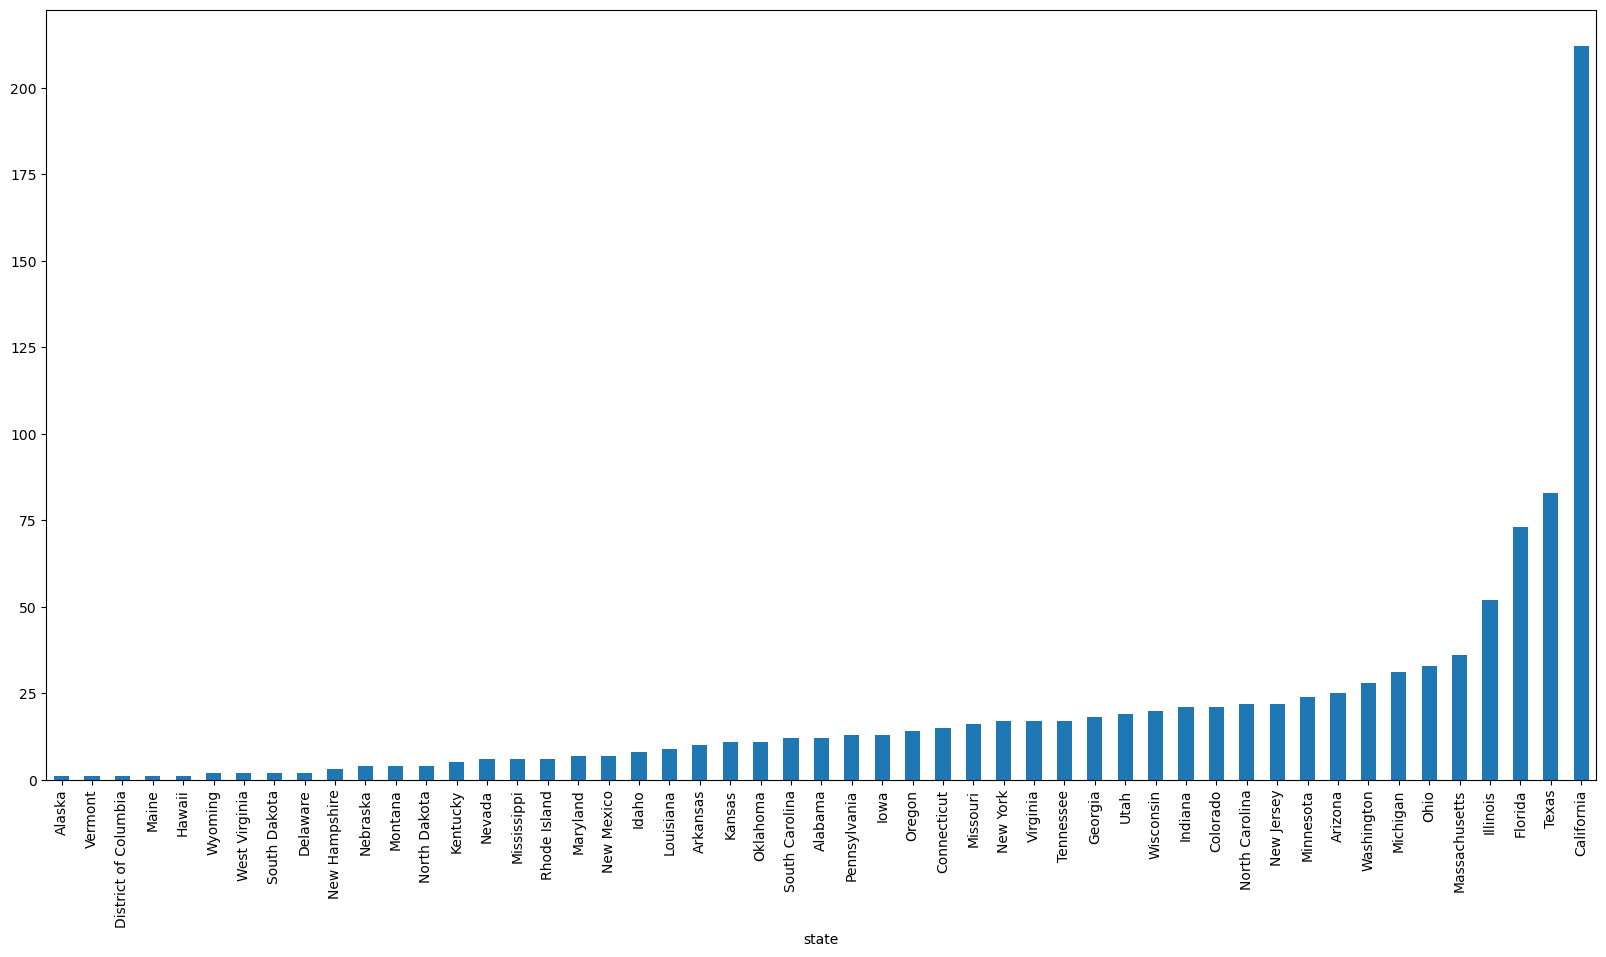

In [9]:
df.groupby(['state']) ['city'].count().sort_values().plot.bar(figsize=(20, 10))

In [10]:
df.loc[df['state'] == 'Pennsylvania', ['city','growth_from_2000_to_2013']].set_index('city')

,growth_from_2000_to_2013
city,
Philadelphia,2.6%
Pittsburgh,-8.3%
Allentown,11.2%
Erie,-2.8%
Reading,8.0%
Scranton,0.0%
Bethlehem,5.2%
Lancaster,4.5%
Harrisburg,0.6%


<Axes: xlabel='city'>

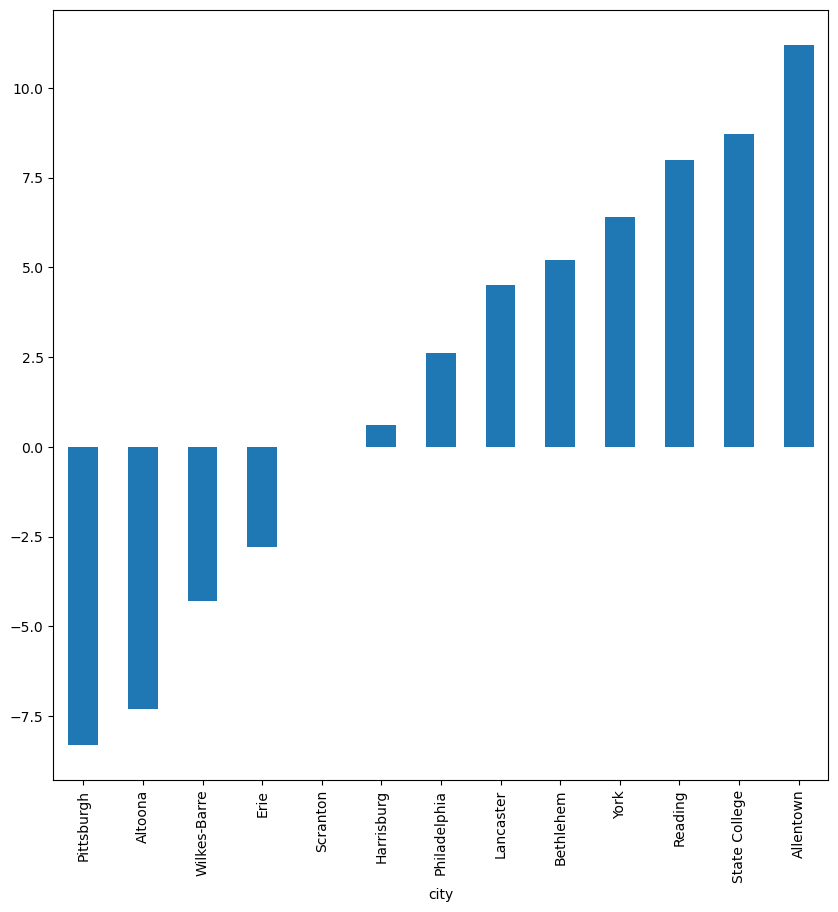

In [11]:

df.loc[df['state']=='Pennsylvania', ['city','growth_from_2000_to_2013']]\
.set_index('city')['growth_from_2000_to_2013'].str.replace('%', '').astype(np.float16).sort_values().plot.bar(figsize=(10, 10))

<Axes: ylabel='population'>

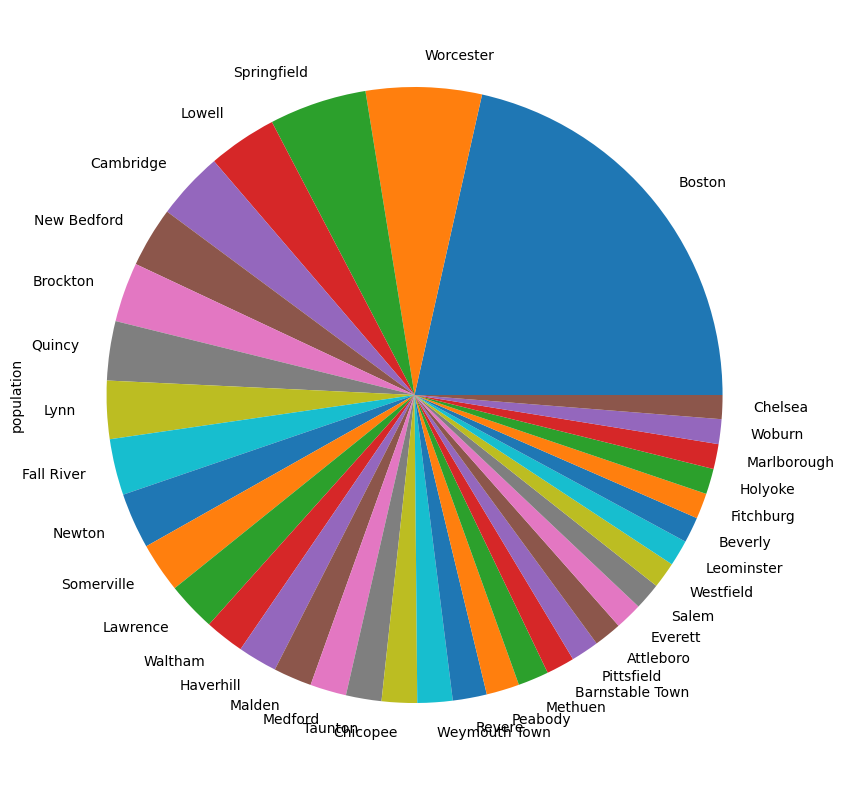

In [13]:
df.loc[df['state']=='Massachusetts', ['city','population']].set_index('city')['population'].plot.pie(figsize=(15, 10))

<Axes: xlabel='longitude', ylabel='latitude'>

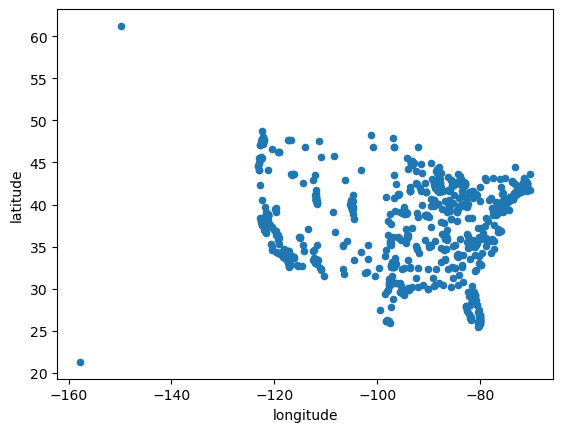

In [14]:
#pip install seaborn
#import seaborn as sns
#sns.replot(x='trip_distance', y='total_amount')
df.plot.scatter(x='longitude', y='latitude') # il y a 4 methodesw de le faire, chaque point represente un colonne dans le DF

In [ ]:
# pour donner de couleur
sns.replot(x='trip_distance', y='total_amount', data = df, hue = 'passanger_count')
plt.title('total_amount' vs  'trip_distance')
plt.xlabel('trip_distance')
plt.ylabel('trip_amoount')

<Axes: >

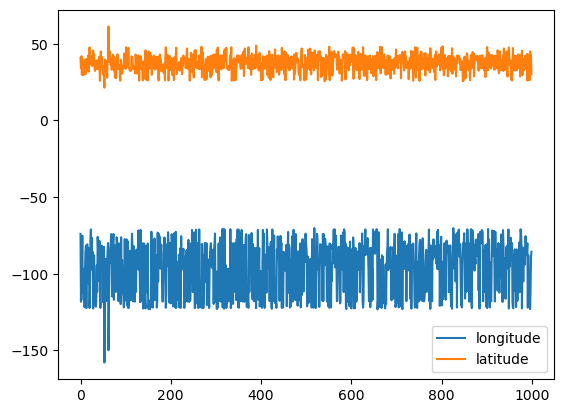

In [15]:
df.loc[:, [x='trip_dsitance', y='latitude']].plot()
#df.loc[:, ['latitude']].plot() por si quiero ver una sola encuesta

<Axes: >

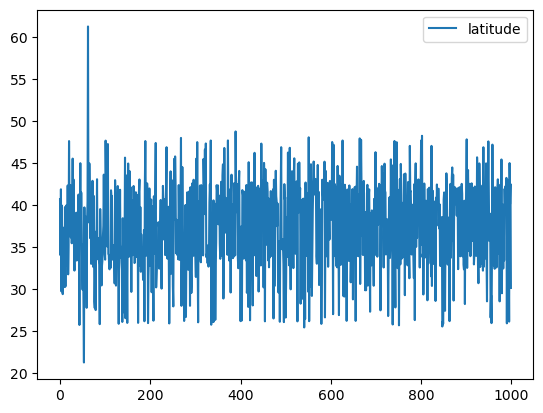

In [16]:
df.loc[:, ['latitude']].plot() 

In [20]:
#EXERCICE 1 Chicago

df = pd.read_csv('C/Lir:i/Big Data/Session 2/Python/Programmation2/Semaine 7/chicago,il.csv',  usecols=[0, 1, 2], # I wanted to give them names of my own
                 header = 0, #to indicate that the first row of the file contains headers, and thus shouldn’t be treated as data.
                 names=['date_time','mintemp', 'maxtemp'],
                 parse_dates=['date_time'], #  indicated that date_time should be parsed as a datetime column
                 index_col='date_time')
df

,mintemp,maxtemp
date_time,,
2018-12-11 00:00:00,1,-2
2018-12-11 03:00:00,1,-2
2018-12-11 06:00:00,1,-2
2018-12-11 09:00:00,1,-2
2018-12-11 12:00:00,1,-2
...,...,...
2019-03-11 09:00:00,3,-2
2019-03-11 12:00:00,3,-2
2019-03-11 15:00:00,3,-2


<Axes: >

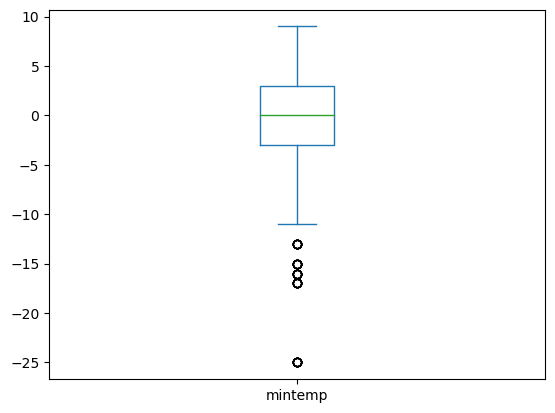

In [21]:
df['mintemp'].plot.box()

In [22]:
df['mintemp'].median()

0.0

<Axes: >

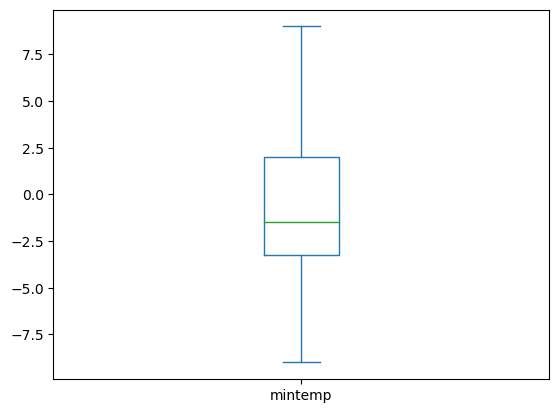

In [24]:
df.loc['01-Feb-2019':'28-Feb-2019','mintemp'].plot.box()

<Axes: >

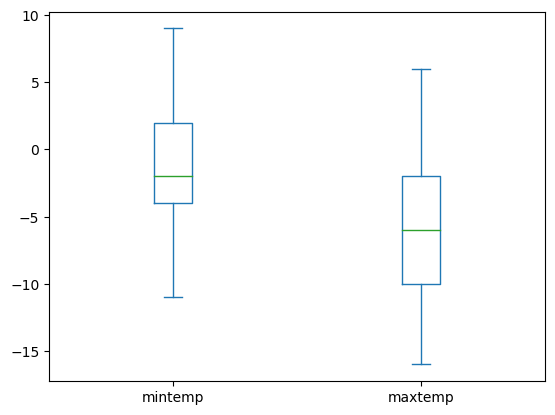

In [26]:
df.loc['01-Feb-2019':'30-Mar-2019',['mintemp', 'maxtemp']].plot.box()

In [2]:
#EXERCICE 2 TAXI NY
filenames = ['C:/Liri/Big Data/Session 2/Python/Programmation2/Semaine 7/nyc_taxi_2020-01.csv', 'C:/Liri/Big Data/Session 2/Python/Programmation2/Semaine 7/nyc_taxi_2020-07.csv']
all_dfs = []
for one_filename in filenames:
    print(one_filename)
    all_dfs.append(pd.read_csv(one_filename, usecols = ['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'fare_amount','extra','mta_tax','tip_amount','tolls_amount', 'improvement_surcharge','total_amount','congestion_surcharge'], 
                               parse_dates = ['tpep_pickup_datetime']))     
    

C:/Liri/Big Data/Session 2/Python/Programmation2/Semaine 7/nyc_taxi_2020-01.csv
C:/Liri/Big Data/Session 2/Python/Programmation2/Semaine 7/nyc_taxi_2020-07.csv


In [3]:
df=pd.concat(all_dfs)
df

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2020-01-01 00:28:15,1.0,1.20,6.00,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,2020-01-01 00:35:39,1.0,1.20,7.00,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,2020-01-01 00:47:41,1.0,0.60,6.00,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,2020-01-01 00:55:23,1.0,0.80,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2020-01-01 00:01:58,1.0,0.00,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...
800407,2020-07-19 13:27:52,NaN,24.23,79.95,0.0,0.5,2.75,0.0,0.3,83.50,0.0
800408,2020-07-19 13:02:00,NaN,4.40,16.23,0.0,0.5,2.75,0.0,0.3,19.78,0.0
800409,2020-07-19 13:32:00,NaN,8.78,34.90,0.0,0.5,2.75,0.0,0.3,38.45,0.0
800410,2020-07-19 13:28:00,NaN,6.50,18.75,0.0,0.5,7.72,0.0,0.3,29.77,2.5


In [4]:
#2
df['year'] = df['tpep_pickup_datetime'].dt.year
df['month'] = df['tpep_pickup_datetime'].dt.month
df['day'] = df['tpep_pickup_datetime'].dt.day

In [5]:
df.head(5)

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day
0,2020-01-01 00:28:15,1.0,1.2,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,2020,1,1
1,2020-01-01 00:35:39,1.0,1.2,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,2020,1,1
2,2020-01-01 00:47:41,1.0,0.6,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,2020,1,1
3,2020-01-01 00:55:23,1.0,0.8,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,2020,1,1
4,2020-01-01 00:01:58,1.0,0.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2020,1,1


In [41]:
#df.loc[df[(df['month'].isin([1, 7])) &
df = df.loc[(df['month'].isin([1,7])) & (df['year'] == 2020 ) ]
df.head()

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day
0,2020-01-01 00:28:15,1.0,1.2,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,2020,1,1
1,2020-01-01 00:35:39,1.0,1.2,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,2020,1,1
2,2020-01-01 00:47:41,1.0,0.6,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,2020,1,1
3,2020-01-01 00:55:23,1.0,0.8,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,2020,1,1
4,2020-01-01 00:01:58,1.0,0.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2020,1,1


In [42]:
df.index.is_unique

False

In [45]:
df=df.reset_index(drop=True)
df

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day
0,2020-07-11 16:07:53,2.0,0.87,6.5,0.0,0.5,0.00,0.0,0.3,9.80,2.5,2020,7,11
1,2020-01-03 10:20:20,1.0,5.16,22.5,0.0,0.5,5.16,0.0,0.3,30.96,2.5,2020,1,3
2,2020-01-26 19:07:08,1.0,0.42,4.0,0.0,0.5,0.00,0.0,0.3,7.30,2.5,2020,1,26
3,2020-01-13 09:58:16,6.0,2.98,14.0,0.0,0.5,2.00,0.0,0.3,19.30,2.5,2020,1,13
4,2020-01-27 16:19:15,1.0,5.23,19.5,1.0,0.5,1.00,0.0,0.3,24.80,2.5,2020,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72047,2020-01-16 10:29:05,5.0,1.02,6.0,0.0,0.5,1.86,0.0,0.3,11.16,2.5,2020,1,16
72048,2020-01-15 01:50:06,1.0,0.70,5.0,3.0,0.5,2.60,0.0,0.3,11.40,2.5,2020,1,15
72049,2020-01-24 20:55:42,1.0,0.90,5.5,3.0,0.5,1.85,0.0,0.3,11.15,2.5,2020,1,24
72050,2020-07-01 00:25:25,1.0,0.94,6.0,0.5,0.5,1.96,0.0,0.3,11.76,2.5,2020,7,1


In [44]:
df = df.sample(frac=0.01)
df

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day
223899,2020-07-11 16:07:53,2.0,0.87,6.5,0.0,0.5,0.00,0.0,0.3,9.80,2.5,2020,7,11
374745,2020-01-03 10:20:20,1.0,5.16,22.5,0.0,0.5,5.16,0.0,0.3,30.96,2.5,2020,1,3
5202990,2020-01-26 19:07:08,1.0,0.42,4.0,0.0,0.5,0.00,0.0,0.3,7.30,2.5,2020,1,26
2334349,2020-01-13 09:58:16,6.0,2.98,14.0,0.0,0.5,2.00,0.0,0.3,19.30,2.5,2020,1,13
5351308,2020-01-27 16:19:15,1.0,5.23,19.5,1.0,0.5,1.00,0.0,0.3,24.80,2.5,2020,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986337,2020-01-16 10:29:05,5.0,1.02,6.0,0.0,0.5,1.86,0.0,0.3,11.16,2.5,2020,1,16
2718773,2020-01-15 01:50:06,1.0,0.70,5.0,3.0,0.5,2.60,0.0,0.3,11.40,2.5,2020,1,15
4777594,2020-01-24 20:55:42,1.0,0.90,5.5,3.0,0.5,1.85,0.0,0.3,11.15,2.5,2020,1,24
30,2020-07-01 00:25:25,1.0,0.94,6.0,0.5,0.5,1.96,0.0,0.3,11.76,2.5,2020,7,1


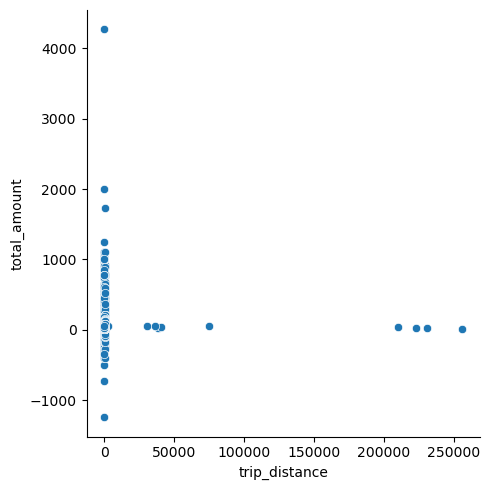

In [6]:
#pip install seaborn
import seaborn as sns
sns.relplot(x='trip_distance' , y='total_amount' , data=df)

Text(52.6479297839506, 0.5, 'Tip ($)')

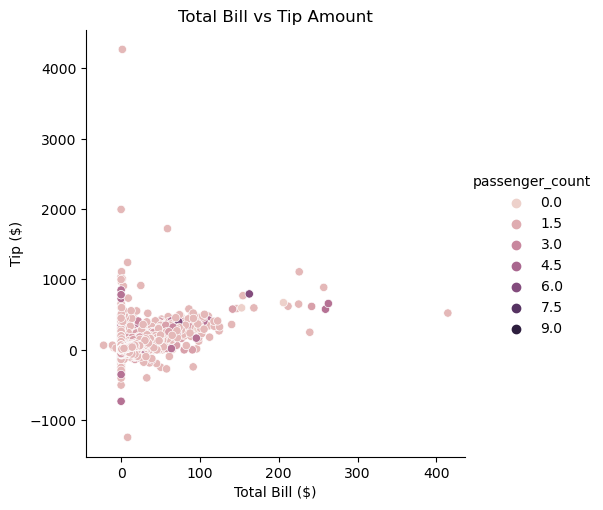

In [17]:
sns.relplot(x='trip_distance' ,y = 'total_amount' , data =df, hue='passenger_count')

import matplotlib.pyplot as plt


plt.title('Total Bill vs Tip Amount')

plt.xlabel('Total Bill ($)')

plt.ylabel('Tip ($)')

Text(47.344124228395046, 0.5, 'Tip ($)')

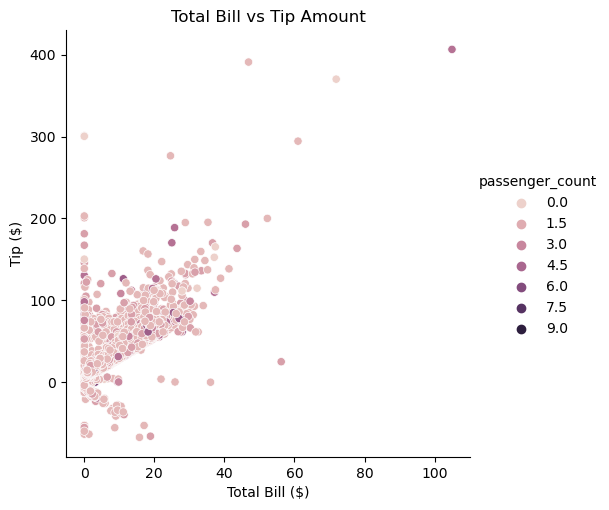

In [49]:
sns.relplot(x='trip_distance' ,y = 'total_amount' , data =df, hue='passenger_count').style='passenger_count'




import matplotlib.pyplot as plt




plt.title('Total Bill vs Tip Amount')

plt.xlabel('Total Bill ($)')

plt.ylabel('Tip ($)')

C:\Users\lirio\miniconda3\envs\myEnv\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


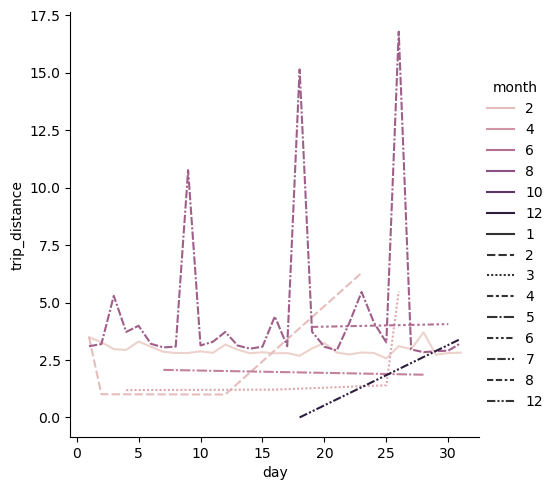

In [8]:

import matplotlib.pyplot as plt
sns.relplot(x='day' ,y= 'trip_distance', kind ='line', data = df, hue ='month', ci = None, style = 'month')

In [11]:
#7 la foncion count renvoi la compte du mois
#data = df.groupby(['month' , 'day']) ['year'.count
data=df.groupby(['month','day'])['year'].count()
data                                    
#data = df.groupby(['month' , 'day']).year.count().to_frame() #Tres important pour l'examen


month  day
1      1      169458
       2      162144
       3      183477
       4      182752
       5      164399
               ...  
7      30      33873
       31      34541
8      1           2
12     18          2
       31        140
Name: year, Length: 78, dtype: int64

In [13]:
data=df.groupby(['month','day']).year.count().to_frame()

data

year
month day        
1     1    169458
      2    162144
      3    183477
      4    182752
      5    164399
...           ...
7     30    33873
      31    34541
8     1         2
12    18        2
      31      140

[78 rows x 1 columns]

C:\Users\lirio\miniconda3\envs\myEnv\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


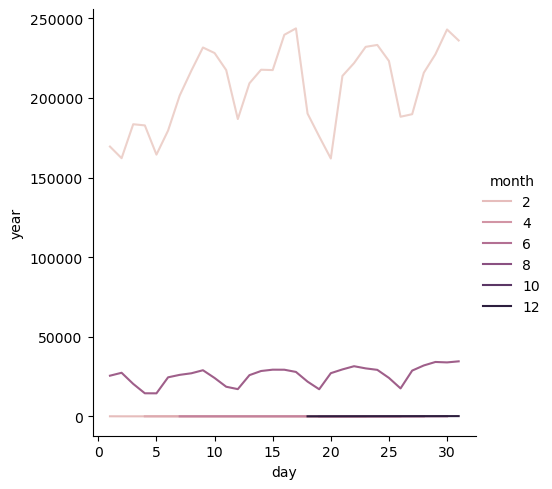

In [16]:
sns.relplot(x='day' ,y= 'year', hue ='month', kind ='line', data = data,ci = None)


In [18]:
#IV PARTE FICHIERS NYC_TAXI

cfilename = ['./data/nyc_taxi_2019-01.csv','./data/nyc_taxi_2019-07.csv' ,'./data/nyc_taxi_2020-01.csv' ,'./data/nyc_taxi_2020-07.csv']

all_dfs =[]

for one_filename in cfilename:

    print(one_filename )

    all_dfs.append(pd.read_csv( one_filename, usecols=['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'fare_amount',

                                                        'extra','mta_tax','tip_amount','tolls_amount', 'improvement_surcharge',

                                                        'total_amount','congestion_surcharge'] ,

                                                        parse_dates = ['tpep_pickup_datetime']))

./data/nyc_taxi_2019-01.csv
./data/nyc_taxi_2019-07.csv
./data/nyc_taxi_2020-01.csv
./data/nyc_taxi_2020-07.csv


In [19]:
# POUR CONCATENER LES DATAFRAME

df =pd.concat(all_dfs)

df

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-01-01 00:46:40,1.0,1.50,7.00,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,2019-01-01 00:59:47,1.0,2.60,14.00,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2018-12-21 13:48:30,3.0,0.00,4.50,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2018-11-28 15:52:25,5.0,0.00,3.50,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2018-11-28 15:56:57,5.0,0.00,52.00,0.0,0.5,0.00,0.0,0.3,55.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...
800407,2020-07-19 13:27:52,NaN,24.23,79.95,0.0,0.5,2.75,0.0,0.3,83.50,0.0
800408,2020-07-19 13:02:00,NaN,4.40,16.23,0.0,0.5,2.75,0.0,0.3,19.78,0.0
800409,2020-07-19 13:32:00,NaN,8.78,34.90,0.0,0.5,2.75,0.0,0.3,38.45,0.0
800410,2020-07-19 13:28:00,NaN,6.50,18.75,0.0,0.5,7.72,0.0,0.3,29.77,2.5


In [23]:
# Pour creer les colonnes

df['year'] = df['tpep_pickup_datetime'].dt.year
df['month'] = df['tpep_pickup_datetime'].dt.month
df['day'] = df['tpep_pickup_datetime'].dt.day

In [ ]:
data=df.groupby(['year','month']).year.count().to_frame()

data

<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

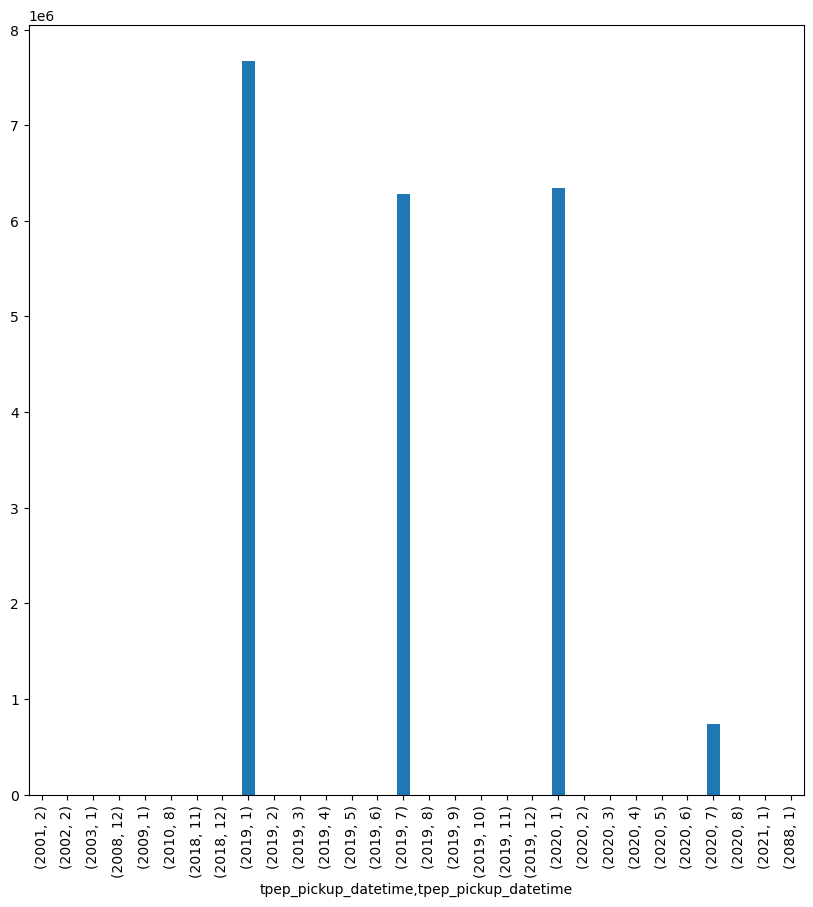

In [25]:
# Cree un diagramme a bar
df.groupby([df['tpep_pickup_datetime'].dt.year,df['tpep_pickup_datetime'].dt.month])['passenger_count'].count().plot.bar(figsize=(10,10))

<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

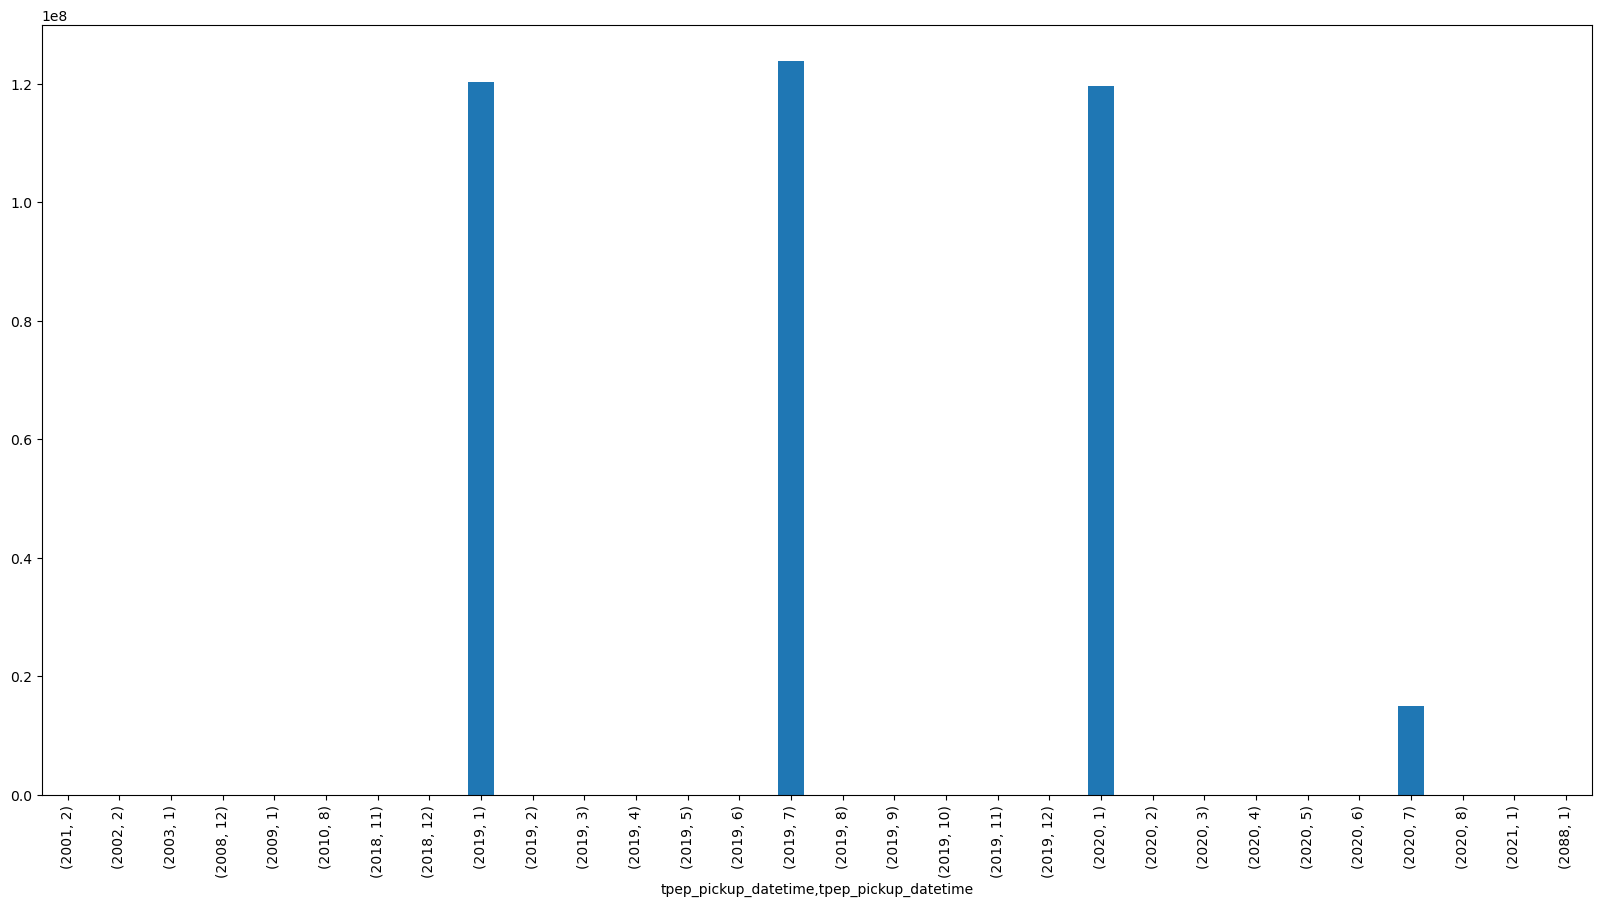

In [27]:

df.groupby([df['tpep_pickup_datetime'].dt.year,df['tpep_pickup_datetime'].dt.month])['total_amount'].sum().plot.bar(figsize=(20,10))

In [28]:
df.groupby([df['tpep_pickup_datetime'].dt.year,
            df['tpep_pickup_datetime'].dt.month])[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount']].sum()

fare_amount       extra  \
tpep_pickup_datetime tpep_pickup_datetime                            
2001                 2                            2.50        0.50   
2002                 2                          126.50        0.50   
2003                 1                            0.00        0.00   
2008                 12                         688.50       18.00   
2009                 1                         1769.00       26.00   
2010                 8                           11.50        0.50   
2018                 11                         711.15        2.50   
                     12                        5182.50      141.00   
2019                 1                     95144793.58  2515127.75   
                     2                          885.60       39.50   
                     3                           40.00        4.00   
                     4                           83.00        3.50   
                     5                           20.50        0.50   
                     6                         2598.50       83.50   
                     7                     85880298.47  7344663.57   
                     8                          770.50       18.50   
                     9                          489.00       15.50   
                     10                          32.00        1.00   
                     11                         102.00        1.00   
                     12                        1646.51       60.50   
2020                 1                     81302793.06  7144414.71   
                     2                          687.99       12.50   
                     3                           53.50        1.00   
                     4                            5.50        0.00   
                     5                           60.00        0.00   
                     6                          112.50        3.00   
                     7                     10756158.18   803379.57   
                     8                           31.50        1.00   
2021                 1                           32.00        3.00   
2088                 1                           19.00        0.00   

                                              mta_tax   tip_amount  \
tpep_pickup_datetime tpep_pickup_datetime                            
2001                 2                           0.50         0.00   
2002                 2                           4.50         0.00   
2003                 1                           0.00         0.00   
2008                 12                         22.00        36.11   
2009                 1                          49.50        64.58   
2010                 8                           0.50         3.06   
2018                 11                          4.50         0.00   
                     12                        175.50       597.72   
2019                 1                     3809446.91  14011047.45   
                     2                          36.00       160.84   
                     3                           2.50         7.50   
                     4                           3.00         6.22   
                     5                           0.50         4.36   
                     6                          85.50       382.74   
                     7                     3115132.81  13780380.75   
                     8                          18.00       153.67   
                     9                           6.50        54.88   
                     10                          1.00         3.66   
                     11                          3.00        15.77   
                     12                         63.00       240.91   
2020                 1                     3153201.39  14022342.97   
                     2                          14.50       116.05   
                     3                           2.50         6.00   
                     4                           0.5

<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

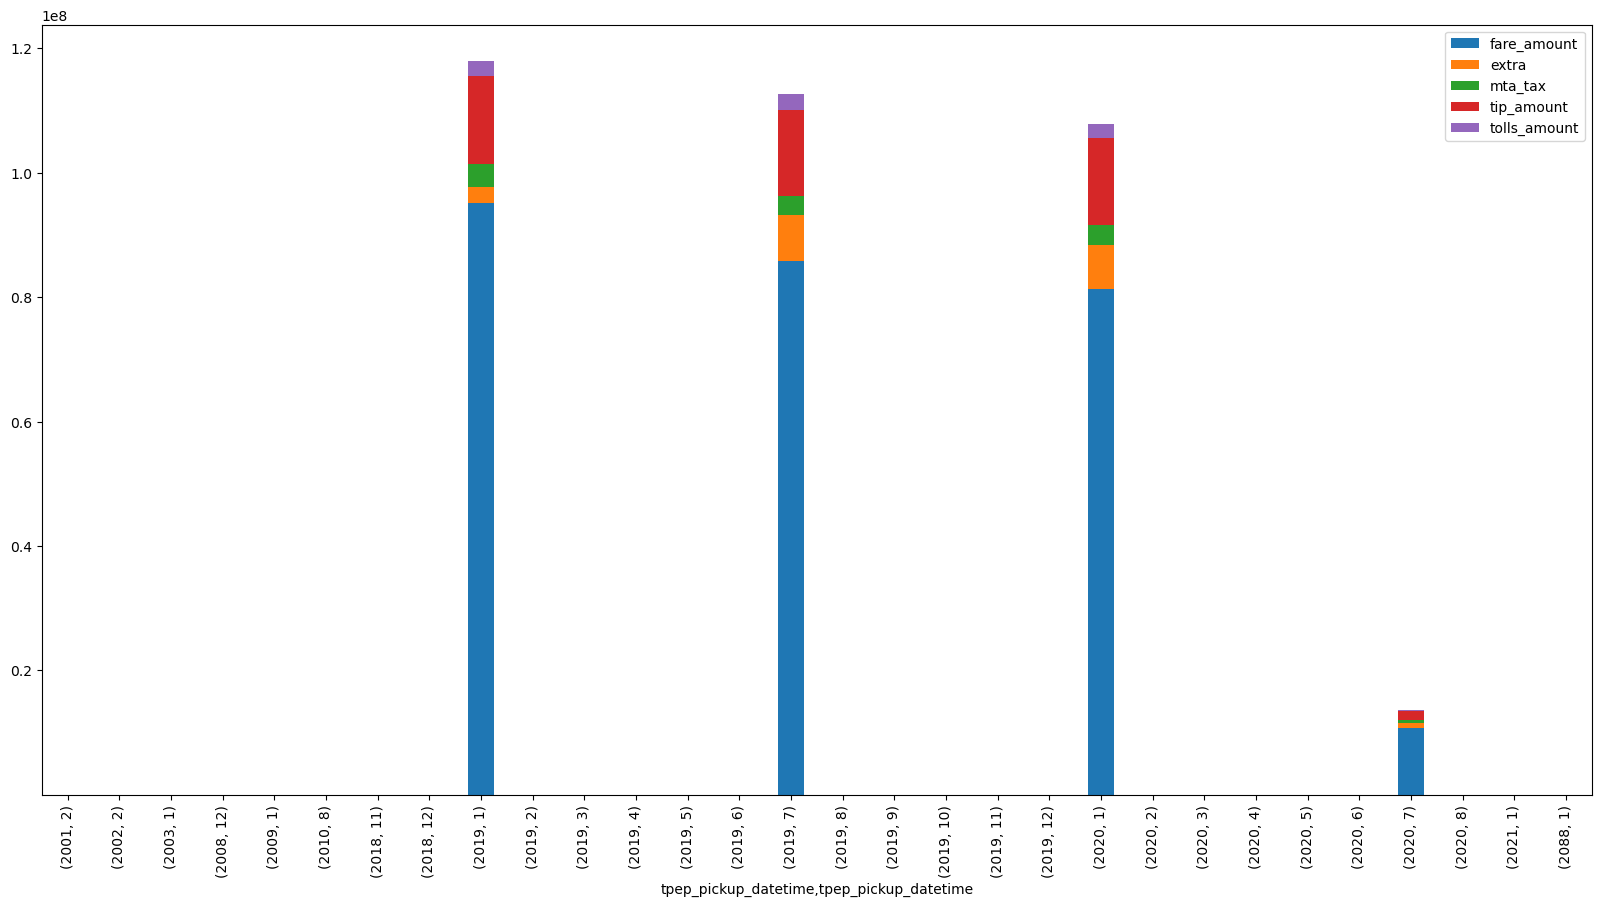

In [29]:
df.groupby([df['tpep_pickup_datetime'].dt.year,
            df['tpep_pickup_datetime'].dt.month])[['fare_amount', 'extra', 'mta_tax',
               'tip_amount', 'tolls_amount']].sum().plot.bar(stacked=True, figsize=(20,10))

<Axes: xlabel='passenger_count'>

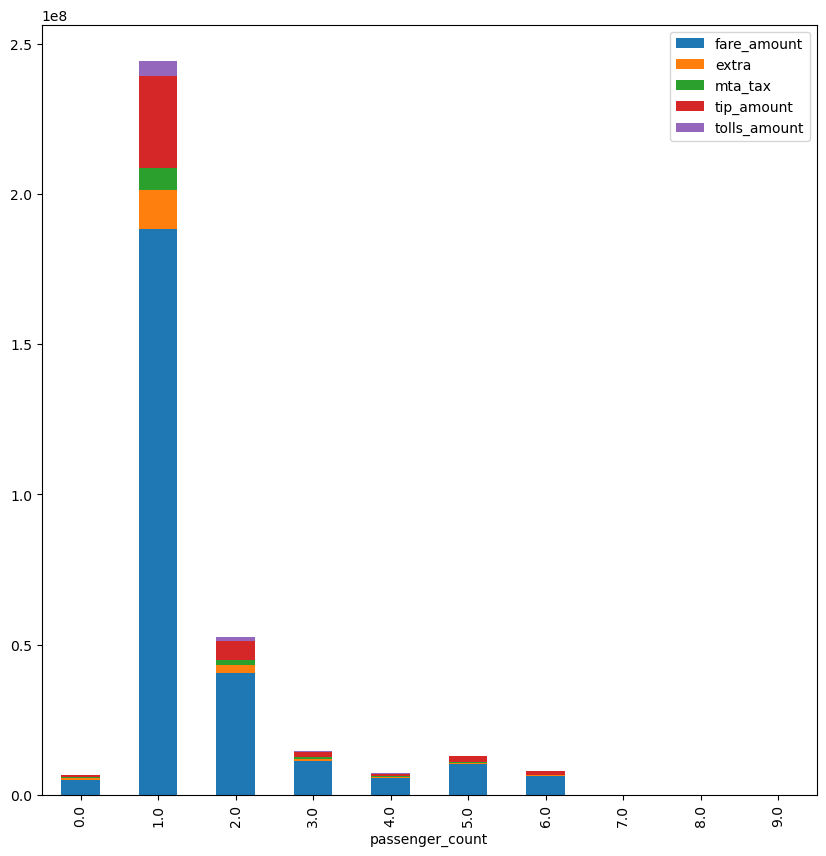

In [31]:
# Ceer un histograme juste pour passenge count

df.groupby(df['passenger_count'])[['fare_amount', 'extra', 'mta_tax',
               'tip_amount', 'tolls_amount']].sum().plot.bar(stacked=True, figsize=(10,10))

In [32]:
#
df = df[df['fare_amount']> 0].copy()

In [34]:
df['tip_percentage'] = df['tip_amount'] / df ['fare_amount']

<Axes: ylabel='Frequency'>

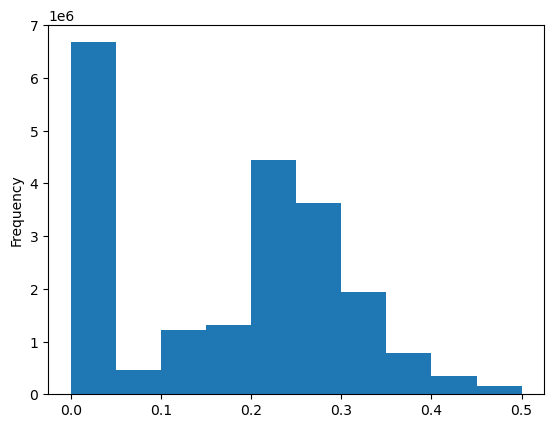

In [35]:
df.loc[df['tip_percentage'] <= .50, 'tip_percentage'].plot.hist()